## 1.1

Calculate the resonant frequency, characteristic impedance, and Q factor of the series RLC circuit

f0 = 1 / (2π * √(L * C))

ρ = √(L / C)

Q = ρ/2

In [55]:
L = 4.07e-3 # mH
C = 0.033e-6 # µF
r = 1.2 # Ω
f0 = 1 / (2π * √(L * C)) # Hz
observed_f0 = 13.94e3 # Hz
ρ = √(L / C)
println("ρ: $(round(ρ, digits=2)) Ω")
Q = 1 / r * √(L / C)
println("Q: $(round(Q, digits=2))")

println("Theoretical f0: $(round(f0, digits=2)) Hz")
println("Observed f0: $observed_f0 Hz")

ρ: 351.19 Ω
Q: 292.66
Theoretical f0: 13733.02 Hz
Observed f0: 13940.0 Hz


## 1.2

Through probing the circuit, obtain the resonant frequency f0, the quality factor Q, and the total impedance Zt at the resonant frequency. For that, the circuit is assembled and the multi-meter is configured with a current limit of 200 mA, U1 = 2 V, and U2 = 20 V in AC mode. Apply a sinusoidal voltage of U1 = 0.1(0.05) V with the frequency calculated in 1.1. Slowly increase the frequency until the current reaches the limit. Measure the voltage U2 and the frequency f0. Then, calculate the quality factor Q and the total impedance Zt at the resonant frequency.

In [56]:
using DataFrames

measured_values = Dict(
    "f" => [13.54e3, 13.64e3, 13.74e3, 13.84e3, 13.94e3, 14.04e3, 14.14e3, 14.24e3, 14.34e3],
    "U2" => [17.4, 20.8, 24.7, 27.7, 28.6, 26.2, 22.6, 18.8, 16.0],
    "Ku" => [0.91, 1.08, 1.29, 1.45, 1.49, 1.37, 1.18, 0.98, 0.83],
    "K" => [0.61, 0.72, 0.83, 0.97, 1.0, 0.91, 0.79, 0.65, 0.55]
)

df = DataFrame(measured_values)

Row,K,Ku,U2,f
,Float64,Float64,Float64,Float64
1,0.61,0.91,17.4,13540.0
2,0.72,1.08,20.8,13640.0
3,0.83,1.29,24.7,13740.0
4,0.97,1.45,27.7,13840.0
5,1.0,1.49,28.6,13940.0
6,0.91,1.37,26.2,14040.0
7,0.79,1.18,22.6,14140.0
8,0.65,0.98,18.8,14240.0
9,0.55,0.83,16.0,14340.0


## 1.3

CAF

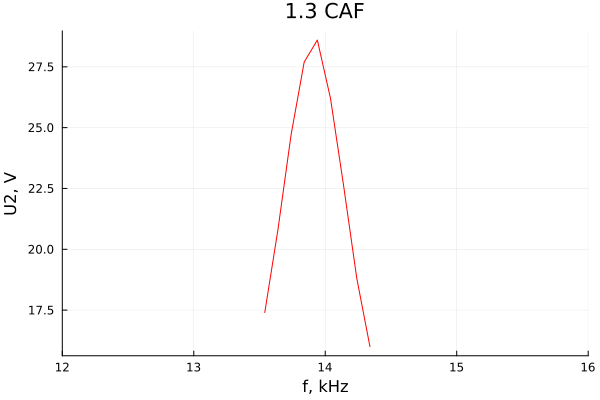

In [70]:
using Plots

plot(df.f ./ 1e3, df.U2, xlabel="f, kHz", ylabel="U2, V", title="1.3 CAF", xlims=(12, 16), legend=false, color=:red)
# save plot as png
# savefig("1.3 CAF.png")

## 4.4

Make a CAF graph using a parallel RLC circuit.

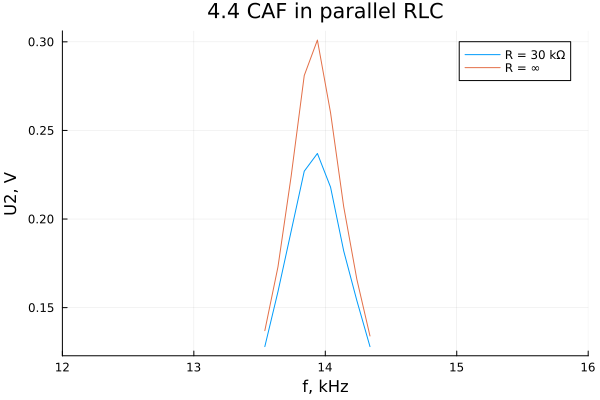

In [71]:
frequencies = [13.54e3, 13.64e3, 13.74e3, 13.84e3, 13.94e3, 14.04e3, 14.14e3, 14.24e3, 14.34e3]
frequencies_khz = frequencies ./ 1e3

measured_values_res_30k = Dict(
    "U2" => [0.128, 0.159, 0.193, 0.227, 0.237, 0.218, 0.182, 0.154, 0.128],
    "K" => [0.54, 0.67, 0.82, 0.96, 1, 0.92, 0.77, 0.65, 0.54]
)

measured_values_res_inf = Dict(
    "U2" => [0.137, 0.173, 0.224, 0.281, 0.301, 0.26, 0.207, 0.166, 0.134],
    "K" => [0.45, 0.57, 0.74, 0.93, 1, 0.86, 0.68, 0.55, 0.45]
)

plot(frequencies_khz, measured_values_res_30k["U2"], xlabel="f, kHz", ylabel="U2, V", title="4.4 CAF in parallel RLC", xlims=(12, 16), label="R = 30 kΩ")
plot!(frequencies_khz, measured_values_res_inf["U2"], xlabel="f, kHz", ylabel="U2, V", xlims=(12, 16), label="R = ∞")
# save plot as png
savefig("4.4 CAF.png")